In [1]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
clim_sites_during_exp = pd.read_csv('../key_files/bioclimvars_experimental_sites_era5.csv')
#sites_test = pd.Series(test).str.split('_').str[0].astype(int)

In [109]:
first_gen = pd.read_csv('../key_files/generation_1_sample_names.txt',header=None)[0]
samples = first_gen.to_list()

delta_ef=pd.read_csv('../key_files/delta_ecotype_freq.txt', sep = '\t', usecols = samples)#[['log_p1_p0','ecotype', 'site','plot']]

delta_ef=pd.read_csv('../key_files/merged_ecotype_frequency.txt', sep = '\t', usecols = samples)#[['log_p1_p0','ecotype', 'site','plot']]

In [37]:
delta_ef

,1_1_1,1_1_2,1_1_3,1_1_4,1_1_5,1_1_6,1_1_7,1_1_8,1_1_9,1_1_10,...,60_1_3,60_1_4,60_1_5,60_1_6,60_1_7,60_1_8,60_1_9,60_1_10,60_1_11,60_1_12
0,-0.004779,-0.003618,-0.004384,-0.004367,-0.003516,-0.003465,-0.002892,-0.003213,-0.003949,-0.003536,...,-0.002931,-0.006334,-0.005966,-0.006406,-0.004394,-0.004535,-0.005999,-0.005784,-0.006148,-0.002948
1,-0.002672,-0.002692,0.004330,-0.002449,-0.002474,-0.002409,-0.002703,-0.002497,-0.002316,0.006181,...,-0.002969,0.035715,-0.003485,-0.003318,-0.003485,-0.002687,-0.001908,-0.002737,-0.003331,-0.003245
2,-0.001783,-0.002597,-0.002392,0.000685,-0.002393,-0.002487,-0.002388,-0.002254,-0.002193,-0.002222,...,-0.002947,-0.002815,-0.003033,-0.002696,-0.002730,-0.002974,-0.002972,-0.002395,-0.003077,-0.002918
3,-0.003439,-0.003167,-0.003294,-0.002949,-0.000956,-0.003314,-0.002798,-0.003107,-0.003227,-0.002876,...,-0.003534,-0.003873,-0.004004,-0.003849,-0.003966,-0.002065,-0.002800,-0.003361,-0.003743,-0.003851
4,-0.003732,-0.000501,-0.003599,-0.003183,0.016787,-0.003634,-0.002911,-0.003327,-0.003423,-0.003125,...,-0.003657,-0.003903,-0.004191,-0.004147,-0.003959,0.010703,-0.002833,-0.003927,-0.003933,-0.004000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,-0.000962,0.004074,-0.000991,0.000051,-0.000095,0.002813,0.002104,0.007236,0.001439,0.003409,...,-0.001014,-0.001117,-0.001234,-0.000819,-0.000961,0.002043,0.012923,-0.000378,0.000292,-0.001235
227,-0.000994,0.003050,-0.000515,0.000043,-0.000360,0.000012,0.000284,0.004954,-0.001064,-0.000854,...,-0.001474,-0.002874,-0.002784,-0.002976,-0.001884,0.000191,-0.002476,-0.002588,-0.002929,-0.002558
228,-0.000815,-0.000616,-0.000788,-0.000691,-0.000701,0.000035,-0.000778,0.000026,-0.000447,0.000575,...,-0.000946,-0.000996,-0.001157,0.018520,-0.001046,-0.000827,-0.000107,-0.000898,-0.000992,-0.000860
229,-0.001622,-0.001627,-0.001513,-0.001441,-0.001741,-0.001634,-0.001734,-0.001646,-0.001646,-0.001573,...,-0.001898,-0.001696,-0.002060,-0.001937,-0.002022,-0.001833,-0.001715,-0.001767,-0.002158,-0.001991


In [5]:
unique_sites = first_gen.str.split('_').str[0].unique()

In [69]:
file_path = '../jacknife_lfmm/splits_samples.pkl'

# Open and load the .pkl file
with open(file_path, 'rb') as file:
    samples = pickle.load(file)

train = samples[0][0]
test = samples[0][1]

In [48]:
genotype_counts = pd.read_csv('../leave_1_out/genotype_counts_fullgenome231ecotypes.csv').drop('Unnamed: 0', axis=1)

In [47]:
snp_dict = pd.read_csv('../key_files/var_pos_grenenet.csv')

In [96]:
    br_results = pd.read_csv(f'results/split_{split}/binomial_reg_results_last_gen.csv')
    br_results = br_results[br_results['pvalue'] < 0.05/len(br_results)]
    br_results = br_results.reset_index(drop=True)

In [ ]:
br_results['abs_slope'] = abs(br_results['slope'])

br_results = br_results.sort_values('abs_slope').tail(10000)

In [94]:
br_results.sort_values('pvalue')

,60,slope,pvalue,intercept,snp_id
741018,0.363965,4.950846e-01,0.000000e+00,-1.223308,4_10999188
867063,0.535189,4.044567e-01,6.195870e-309,-0.402372,5_7722787
216361,0.315859,4.851916e-01,5.654264e-294,-1.424687,1_24163604
731292,0.277404,5.156013e-01,5.960665e-289,-1.650049,4_10274629
251621,0.282866,5.045492e-01,1.791718e-284,-1.608118,1_27306640
...,...,...,...,...,...
379477,0.460460,-6.211930e-07,9.999518e-01,-0.158491,2_11642966
385922,0.425584,5.057707e-07,9.999611e-01,-0.299891,2_12301315
385934,0.425584,5.057707e-07,9.999611e-01,-0.299891,2_12301877
385935,0.425584,5.057707e-07,9.999611e-01,-0.299891,2_12301879


In [105]:
go_per_site = {}
for split in range(len(samples)):
    print(split)
    br_results = pd.read_csv(f'results/split_{split}/binomial_reg_results_last_gen.csv')
    br_results = br_results[br_results['pvalue'] < 0.05/len(br_results)]
    br_results = br_results.reset_index(drop=True)
    br_results['abs_slope'] = abs(br_results['slope'])

    br_results = br_results.sort_values('abs_slope').tail(10000)
   
    mask_full_genotype = snp_dict['id'].isin(br_results['snp_id'])
    
    genotype_counts_red = genotype_counts.loc[mask_full_genotype,:]
    
    genotype_counts_red = genotype_counts_red.reset_index(drop=True)
    genotype_counts_red = genotype_counts_red.replace({2: 1, 1: 0.5, 0: 0})
    site_predicted = br_results.columns[0]
    print(site_predicted)
    #site_predict_proba = br_results[site_predicted]
    #br_results.loc[br_results[site_predicted] > 0.5, 'snp'] = 1
    
    #br_results.loc[br_results[site_predicted] < 0.5, 'snp'] = -1
    
    prob_alt = br_results[site_predicted]
    
    ## for each site, subrstract the actual value by the probability fo getting a success 
    genotype_counts_subs = genotype_counts_red.sub(prob_alt, axis=0)
    
    ## ge tthe absolute value 
    genotype_counts_subs = abs(genotype_counts_subs)
    
    ## sum over ecotypes 
    go = (genotype_counts_subs.sum(axis=0)) / len(genotype_counts_subs)
    go_per_site[site_predicted] = go

0
1
1
2
2
4
3
5
4
6
5
9
6
10
7
11
8
12
9
13
10
23
11
24
12
25
13
26
14
27
15
28
16
32
17
33
18
37
19
42
20
43
21
45
22
46
23
48
24
49
25
52
26
53
27
54
28
55
29
57
30
60


In [106]:
go_per_site_df = pd.DataFrame(go_per_site)

go_per_site_df.index = go_per_site_df.index.astype(int)

In [107]:
go_per_site_df

,1,2,4,5,6,9,10,11,12,13,...,45,46,48,49,52,53,54,55,57,60
0,0.000406,0.000750,0.001045,0.000556,0.000599,0.000679,0.001173,0.000694,0.000646,0.001167,...,0.000726,0.000426,0.000496,0.000575,0.000645,0.000598,0.001034,0.000511,0.000567,0.001010
1,0.000665,0.000954,0.001019,0.000592,0.000599,0.000721,0.001255,0.000824,0.000911,0.001231,...,0.000719,0.000469,0.000585,0.000659,0.000819,0.000646,0.001037,0.000730,0.000611,0.001043
2,0.001452,0.001570,0.001952,0.001127,0.001309,0.001634,0.001647,0.001457,0.001299,0.001831,...,0.001190,0.001429,0.001547,0.001560,0.001451,0.001143,0.001564,0.001509,0.001655,0.001622
3,0.000449,0.000825,0.001273,0.000639,0.000679,0.000759,0.001267,0.000802,0.000855,0.001335,...,0.001031,0.000551,0.000845,0.000881,0.000938,0.000803,0.001335,0.000721,0.000649,0.001056
4,0.000491,0.000983,0.001288,0.000799,0.000916,0.000969,0.001497,0.000996,0.000974,0.001388,...,0.001071,0.000854,0.000848,0.000963,0.001019,0.000891,0.001466,0.000973,0.000733,0.001046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.000624,0.001047,0.001615,0.001127,0.001349,0.001328,0.001826,0.001036,0.001044,0.001426,...,0.001444,0.001116,0.000928,0.001032,0.001297,0.001185,0.002523,0.001308,0.000886,0.001545
227,0.000406,0.000828,0.001677,0.000515,0.000674,0.000764,0.001299,0.000688,0.000768,0.001215,...,0.000799,0.000426,0.000586,0.000617,0.000731,0.000688,0.001079,0.000597,0.000813,0.001010
228,0.000538,0.001028,0.001310,0.000989,0.000997,0.001067,0.001584,0.000888,0.000923,0.001318,...,0.001054,0.000598,0.000494,0.000833,0.001059,0.000682,0.002185,0.000973,0.001022,0.001166
229,0.000452,0.000788,0.001004,0.000598,0.000638,0.000848,0.001208,0.000732,0.000686,0.001167,...,0.000761,0.000426,0.000540,0.000575,0.000732,0.000680,0.001075,0.000511,0.000608,0.001098


In [108]:
go_per_site_df.to_csv('genomic_offset_per_site_first_gen_test4_only_highest_slopes.csv',index=None)

In [9]:
#go_per_site_df = pd.read_csv('genomic_offset_per_site_first_gen_test2.csv')

In [10]:
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

In [63]:
split = 3

In [64]:
br_results = pd.read_csv(f'results/split_{split}/binomial_reg_results_last_gen.csv')
br_results = br_results[br_results['pvalue'] < 0.05/len(br_results)]

In [ ]:
br_results = br_results[br_results['pvalue'] < 0.05/len(br_results)]

In [66]:
br_results.sort_values('slope')

,5,slope,pvalue,intercept,snp_id
880102,0.036596,-0.590394,4.192610e-123,-3.079824,5_8691599
879746,0.042134,-0.566704,7.010355e-128,-2.940801,5_8672478
879607,0.043587,-0.563294,4.117284e-130,-2.906485,5_8661645
877890,0.043287,-0.558850,3.871881e-127,-2.915120,5_8522591
879543,0.040765,-0.554863,1.178617e-118,-2.979076,5_8657223
...,...,...,...,...,...
709109,0.069483,0.565611,3.195327e-154,-2.777361,4_8373630
709108,0.069483,0.565611,3.195327e-154,-2.777361,4_8373628
709106,0.069483,0.565611,3.195327e-154,-2.777361,4_8373586
709113,0.069483,0.565611,3.195327e-154,-2.777361,4_8373650


In [49]:
split = 30 

In [50]:
site = '60'

In [51]:
print(split)
br_results = pd.read_csv(f'results/split_{split}/binomial_reg_results_last_gen.csv')
br_results = br_results[br_results['pvalue'] < 0.05/len(br_results)]
br_results = br_results.reset_index(drop=True)

mask_full_genotype = snp_dict['id'].isin(br_results['snp_id'])

genotype_counts_red = genotype_counts.loc[mask_full_genotype,:]

genotype_counts_red = genotype_counts_red.reset_index(drop=True)




#go_per_site[site_predicted] = go

30


In [58]:
br_results = br_results.sort_values('pvalue').head(1000)

,57,slope,pvalue,intercept,snp_id
416365,0.213349,0.446767,1.433667e-292,-1.159992,4_10999188
495446,0.386666,0.368262,3.490336e-266,-0.341937,5_7722787
410362,0.147437,0.475880,1.495895e-258,-1.600543,4_10274629
119456,0.180635,0.440275,2.767114e-255,-1.369290,1_24163604
139393,0.153378,0.460253,8.101612e-249,-1.559107,1_27305968
...,...,...,...,...,...
255889,0.348424,0.298347,1.311155e-171,-0.529235,3_1791702
492720,0.503523,0.288429,1.471515e-171,0.107617,5_7376737
492725,0.503523,0.288429,1.471515e-171,0.107617,5_7376823
494732,0.105295,0.441341,1.583860e-171,-1.996622,5_7621771


0


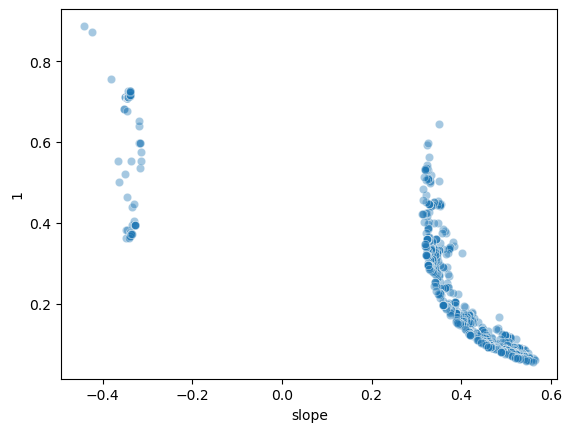

1


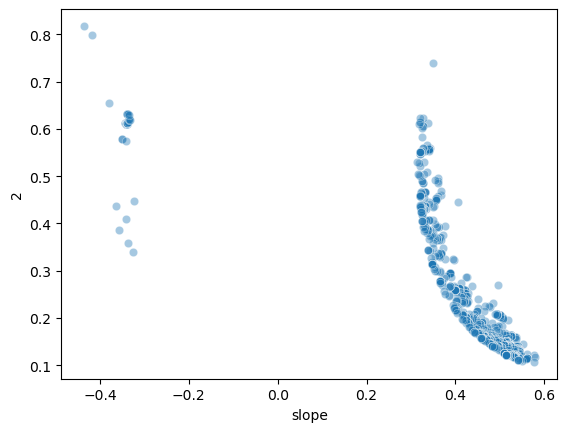

2


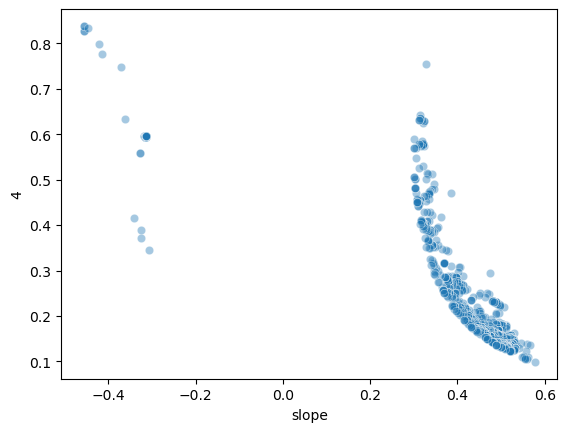

3


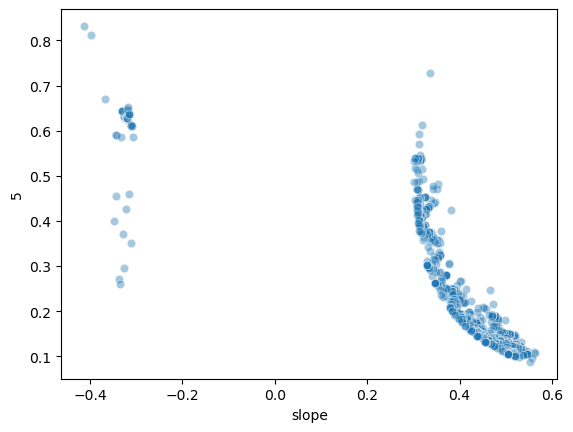

4


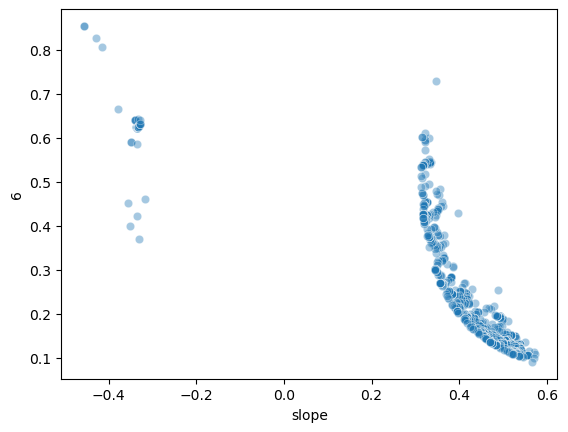

5


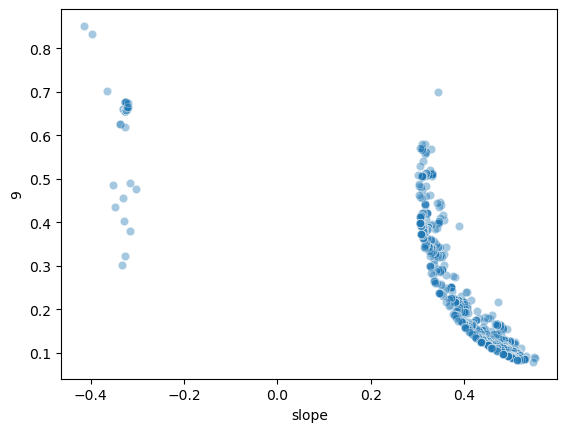

6


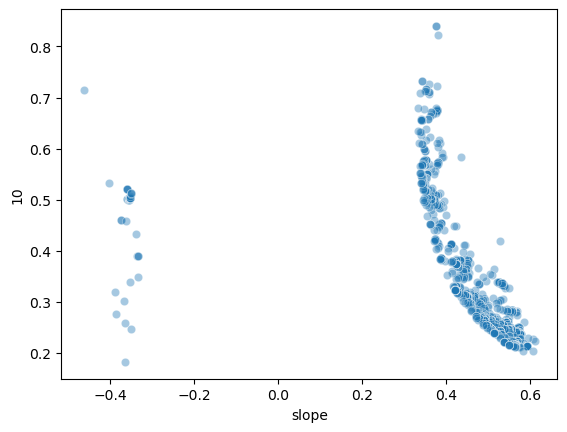

7


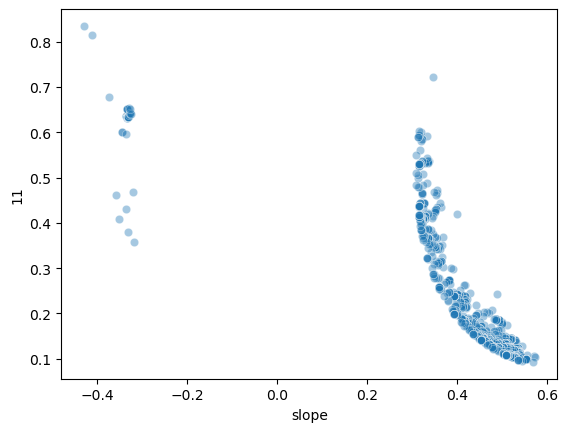

8


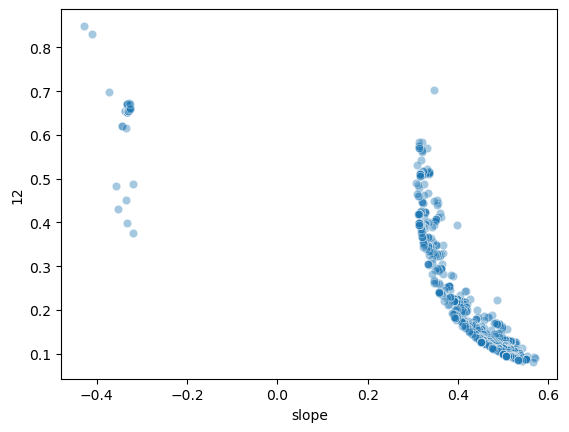

9


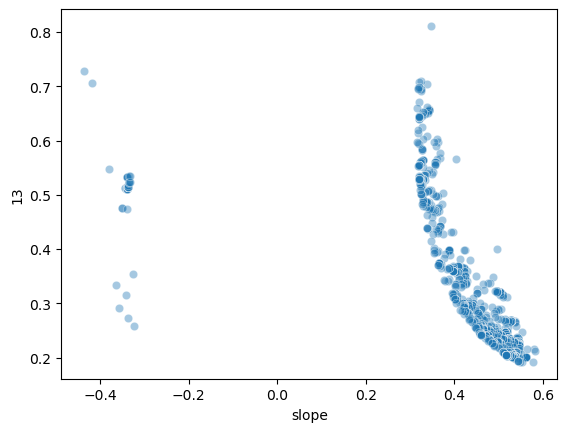

10


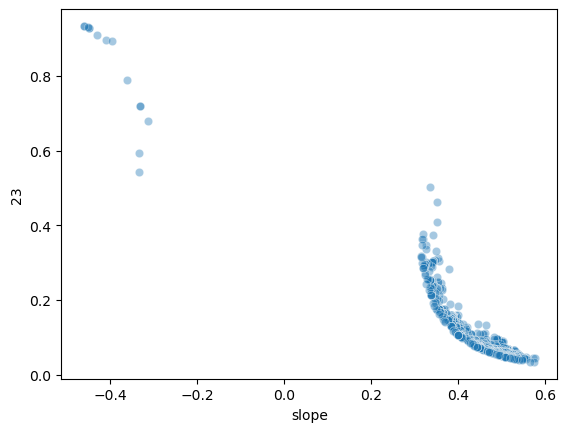

11


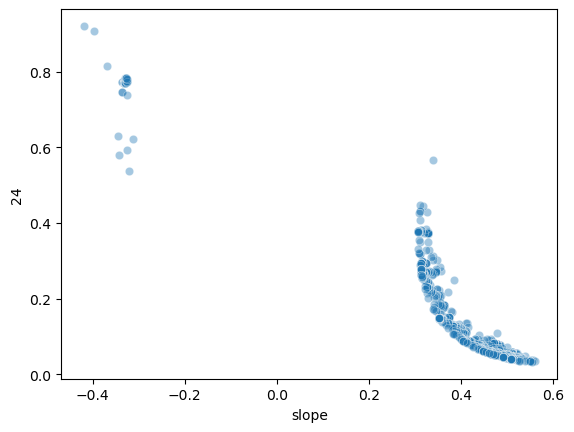

12


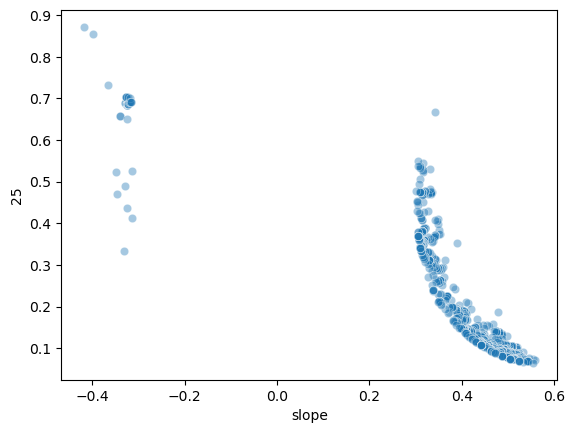

13


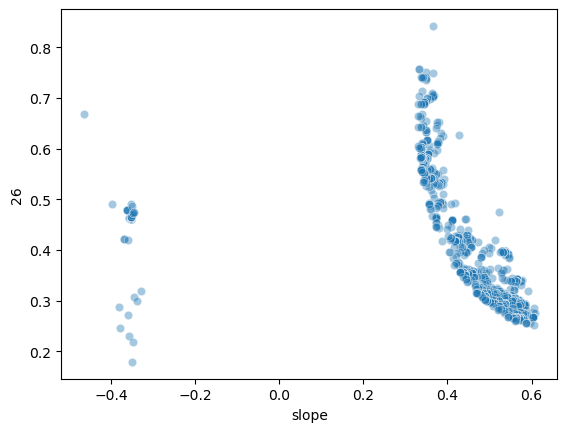

14


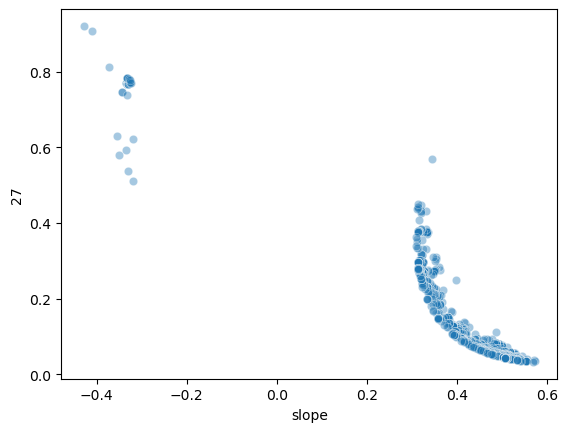

15


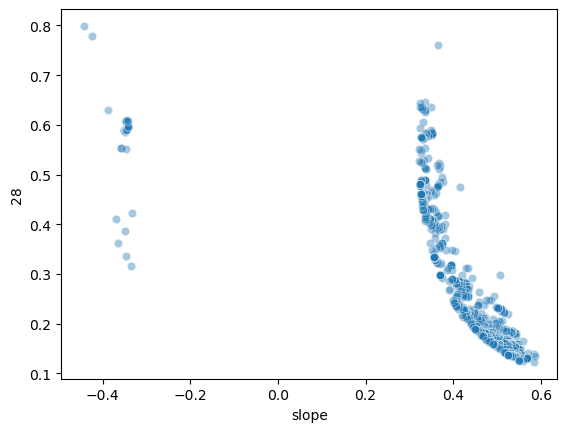

16


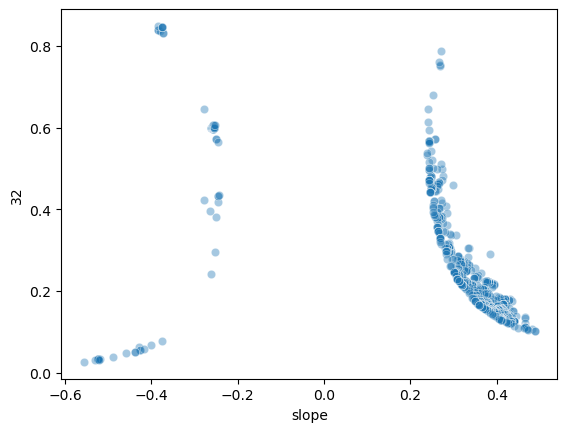

17


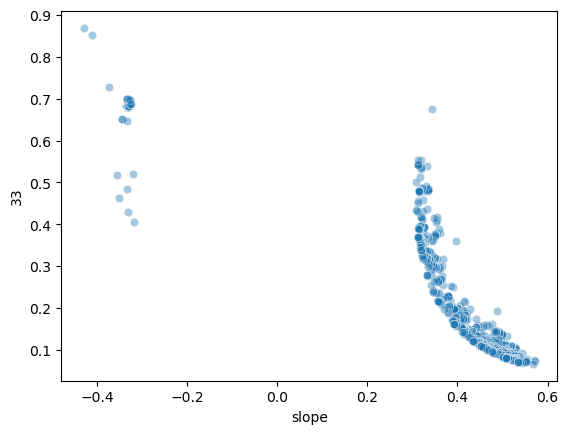

18


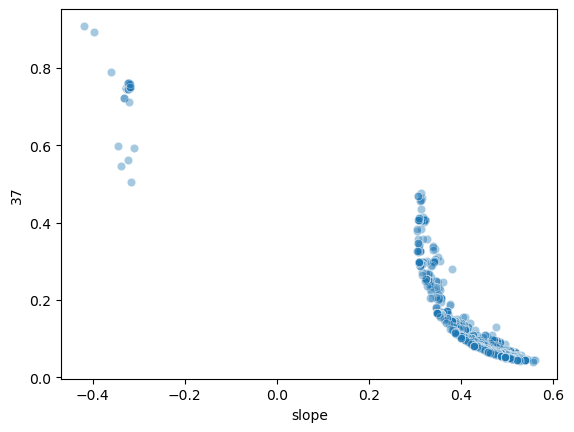

19


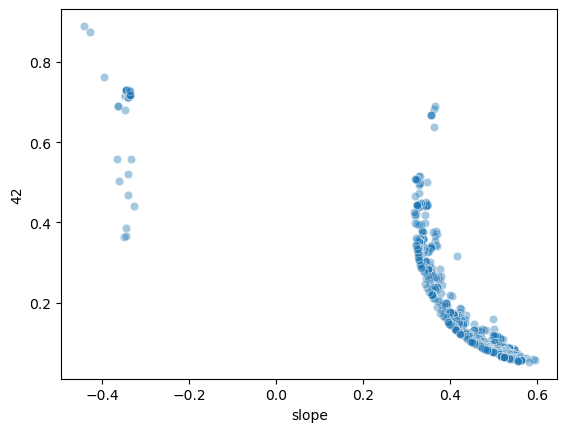

20


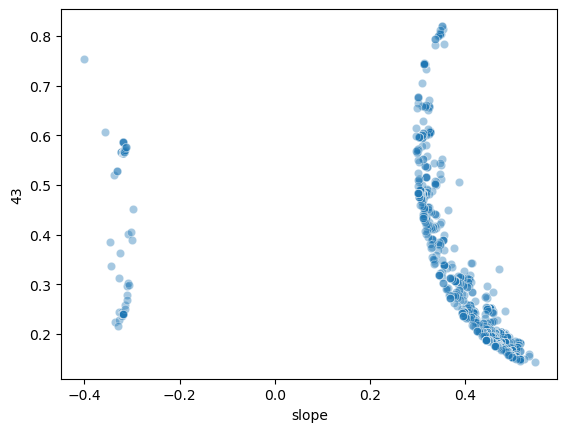

21


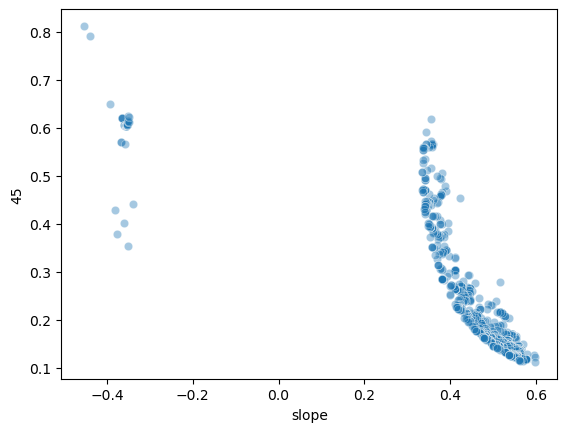

22


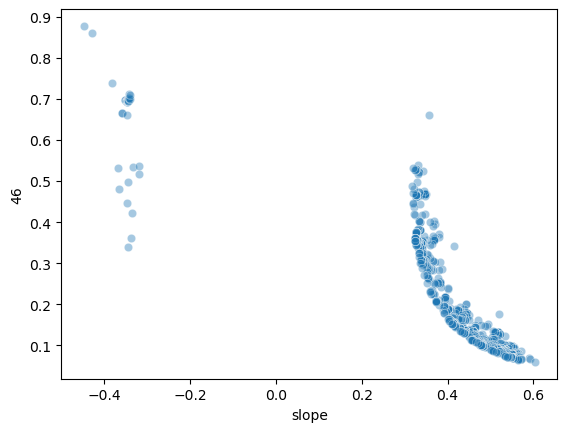

23


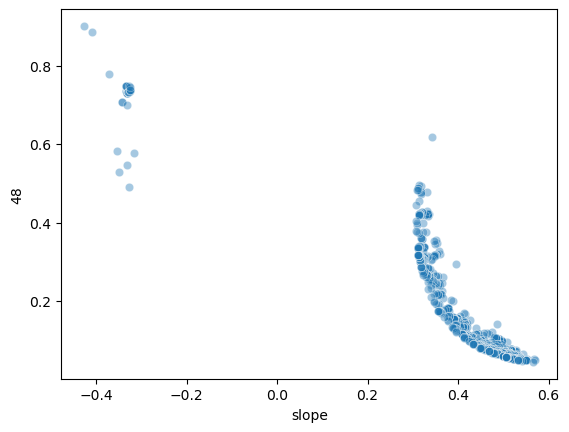

24


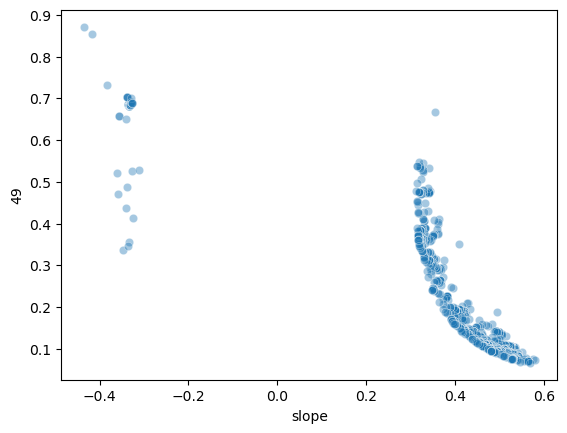

25


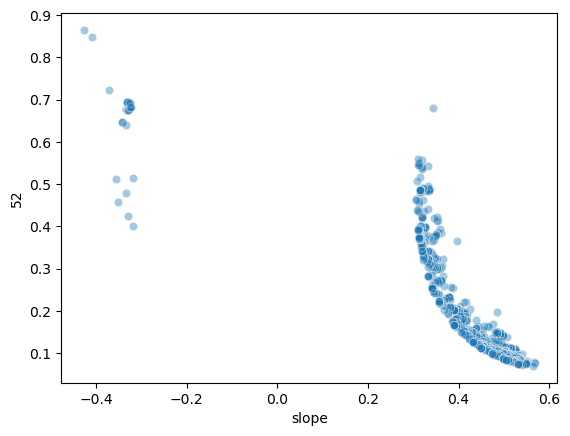

26


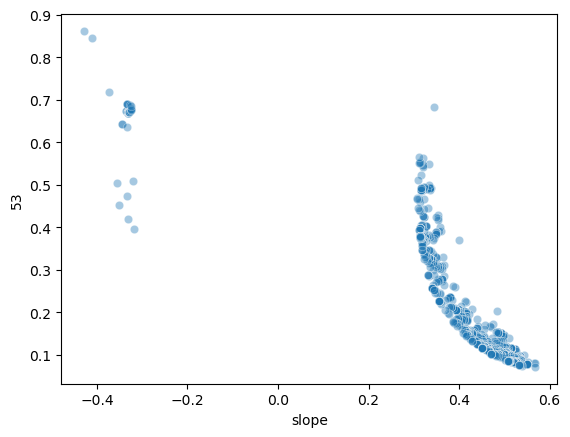

27


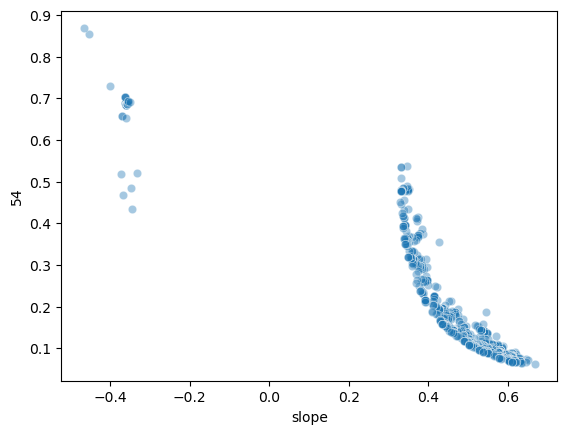

28


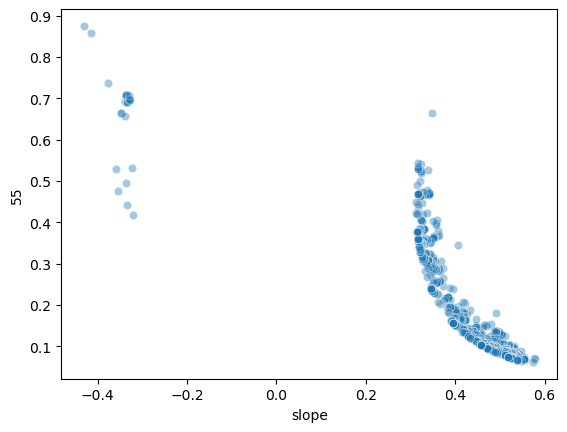

29


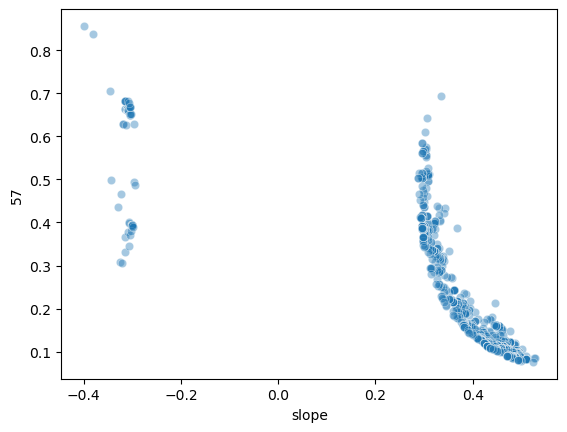

30


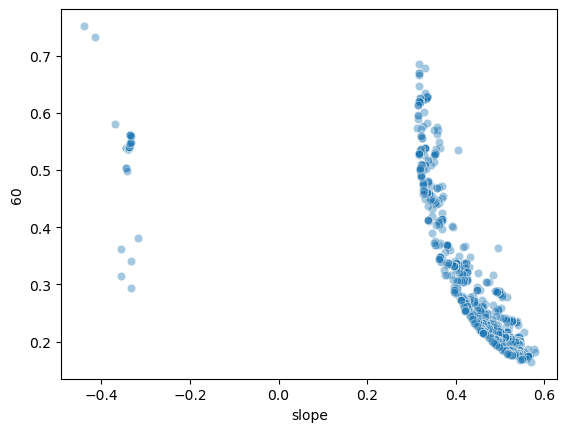

31


FileNotFoundError: [Errno 2] No such file or directory: 'results/split_31/binomial_reg_results_last_gen.csv'

In [59]:

for split in range(len(samples)):
    print(split)
    br_results = pd.read_csv(f'results/split_{split}/binomial_reg_results_last_gen.csv')
    br_results = br_results[br_results['pvalue'] < 0.05/len(br_results)]
    br_results = br_results.reset_index(drop=True)
    br_results = br_results.sort_values('pvalue').head(1000)
    site_predicted = br_results.columns[0]
    sns.scatterplot(br_results, x = 'slope', y = site_predicted, alpha = 0.4)
    plt.show()

In [ ]:
genotype_counts_red = genotype_counts_red.replace({2: 1, 1: 0, 0: -1})
site_predicted = br_results.columns[0]
print(site_predicted)

In [ ]:
br_results.loc[br_results['60'] > 0.5, 'snp'] = 1

br_results.loc[br_results['60'] < 0.5, 'snp'] = -1

snp_present = br_results['snp']

## for each site, subrstract the actual value by the probability fo getting a success 
genotype_counts_subs = genotype_counts_red.sub(snp_present, axis=0)

In [113]:


## ge tthe absolute value 
genotype_counts_subs = abs(genotype_counts_subs)

## sum over ecotypes 
go = (genotype_counts_subs.sum(axis=0)) / len(genotype_counts_subs)

In [114]:
go_per_site_df['60'] = go.values

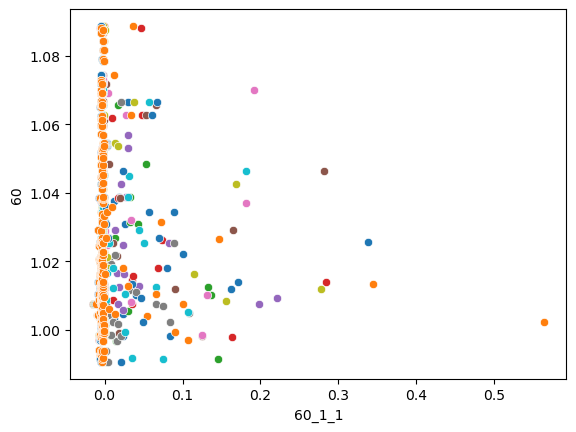

In [38]:
ef = delta_ef[[col for col in delta_ef.columns if col.startswith(f'{site}_')]]
#cd = go.copy()
cd = go_per_site_df[site]

for sample in ef.columns:
    ef_f = ef[sample]
    conc = pd.concat([ef_f, cd],axis=1)
    conc = conc.sort_values(sample)
    ## becasue some ecotpyes are nan 
    conc = conc.dropna()
    X_ranked = conc[sample]
    y_ranked = conc[site]

    sp_correlation, _ = spearmanr(X_ranked, y_ranked)
    pearsonr_value = pearsonr(X_ranked, y_ranked)[0]
    sns.scatterplot(data = conc, x = sample, y = site)
    X = conc[site].values.reshape(-1, 1)  # Independent variable
    y = conc[sample].values # Dependent variable
    
    # Fit the linear model
    model = LinearRegression().fit(X, y)
    # Predict the valu.es
    y_pred = model.predict(X)
    
    r_squared = r2_score(y, y_pred)

    #results[sample] = [sp_correlation, pearsonr_value, r_squared]

In [118]:
sp_correlation

-0.3326811419251234

<Axes: xlabel='60_1_12', ylabel='60'>

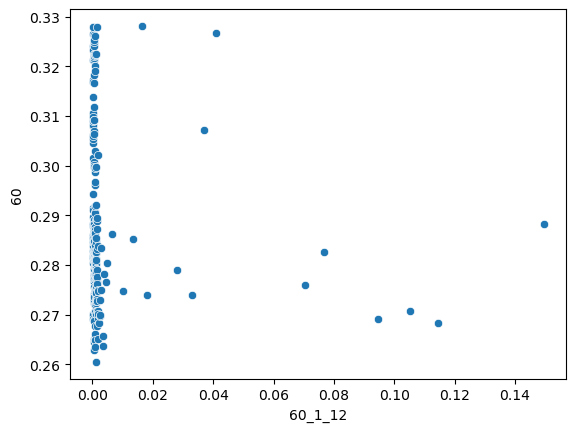

In [79]:
sns.scatterplot(data = conc, x = sample, y = site)

In [77]:
conc

,60_1_12,60
14,0.000109,0.301526
223,0.000110,0.281612
84,0.000111,0.291424
165,0.000122,0.317199
107,0.000129,0.304478
...,...,...
139,0.076727,0.282678
54,0.094663,0.269134
124,0.105046,0.270663
18,0.114431,0.268274


In [110]:
results = {}
for site in unique_sites:
    ## one site 
    ## retreive ecotype frequecnies 
    ef = delta_ef[[col for col in delta_ef.columns if col.startswith(f'{site}_')]]
    cd = go_per_site_df[site]
    
    for sample in ef.columns:
        ef_f = ef[sample]
        conc = pd.concat([ef_f, cd],axis=1)
        conc = conc.sort_values(sample)
        ## becasue some ecotpyes are nan 
        conc = conc.dropna()
        X_ranked = conc[sample]
        y_ranked = conc[site]

        sp_correlation, _ = spearmanr(X_ranked, y_ranked)
        pearsonr_value = pearsonr(X_ranked, y_ranked)[0]

        X = conc[site].values.reshape(-1, 1)  # Independent variable
        y = conc[sample].values # Dependent variable

        # Fit the linear model
        model = LinearRegression().fit(X, y)
        # Predict the valu.es
        y_pred = model.predict(X)
        
        r_squared = r2_score(y, y_pred)

        results[sample] = [sp_correlation, pearsonr_value, r_squared]
    ## retreive climatic distances  


In [157]:
real_top10 = conc['60_1_12'].sort_values().tail(10).index

pred_top10 = conc['60'].sort_values().head(10).index

In [158]:
real_top10

Index([130, 38, 30, 212, 160, 139, 54, 124, 18, 6], dtype='int64')

In [159]:
pred_top10

Index([174, 37, 230, 222, 183, 185, 0, 177, 180, 176], dtype='int64')

In [ ]:
conc['60_1_12']

In [ ]:
go_per_site_df

In [39]:
results = {}
for site in unique_sites:
    # Retrieve ecotype frequencies
    ef = delta_ef[[col for col in delta_ef.columns if col.startswith(f'{site}_')]]
    cd = go_per_site_df[site]
    
    for sample in ef.columns:
        ef_f = ef[sample]
        conc = pd.concat([ef_f, cd], axis=1)
        conc = conc.sort_values(sample)
        # Handle missing values
        conc = conc.dropna()
        X_ranked = conc[sample]
        y_ranked = conc[site]

        # Independent and dependent variables
        X = conc[site].values.reshape(-1, 1)  # Independent variable
        y = conc[sample].values  # Dependent variable

        # Fit the linear model
        model = LinearRegression().fit(X, y)
        # Predict the values
        y_pred = model.predict(X)

        # Find the top 10 indices for observed and predicted values

        top_10_observed_indices = conc[sample].sort_values().tail(10).index
        top_10_predicted_indices = conc[site].sort_values().head(10).index

        # Compare top 10 indices
        common_top_indices = len(set(top_10_observed_indices).intersection(set(top_10_predicted_indices)))

        # Calculate the percentage of common top 10 indices
        top_10_match_percentage = (common_top_indices / 10) * 100

        # Store results (optional: also store the actual top indices if you want)
        results[sample] = {
            'top_10_match_percentage': top_10_match_percentage,
        }

In [78]:
results = pd.DataFrame(results).T

In [41]:
results['top_10_match_percentage'].sort_values()

1_1_1       0.0
32_1_11     0.0
32_1_12     0.0
33_1_1      0.0
37_1_1      0.0
           ... 
23_1_10    20.0
55_1_8     20.0
4_1_7      20.0
53_1_8     30.0
1_1_10     30.0
Name: top_10_match_percentage, Length: 326, dtype: float64

In [79]:
results

,0,1,2
1_1_1,-0.058705,-0.056067,0.003144
1_1_2,0.014394,-0.115047,0.013236
1_1_3,-0.027707,-0.041688,0.001738
1_1_4,0.062272,0.057871,0.003349
1_1_5,0.216636,0.069153,0.004782
...,...,...,...
60_1_8,0.122911,0.058453,0.003417
60_1_9,0.187914,0.034460,0.001188
60_1_10,0.249711,0.069646,0.004851
60_1_11,0.387468,0.237265,0.056295


In [111]:
results = pd.DataFrame(results).T

results.columns = ['sp_correlation', 'pearsonr', 'r_squared']

results['sp_correlation'] = results['sp_correlation'] * -1

results['pearsonr'] = results['pearsonr'] * -1



In [112]:
results = results.reset_index()

results['site'] = results['index'].str.split('_').str[0]

results['plot'] = results['index'].str.split('_').str[2]

In [113]:
results

,index,sp_correlation,pearsonr,r_squared,site,plot
0,1_1_1,0.208277,0.133595,0.017848,1,1
1,1_1_2,0.542861,0.329902,0.108835,1,2
2,1_1_3,0.424629,0.255641,0.065353,1,3
3,1_1_4,0.289089,0.164277,0.026987,1,4
4,1_1_5,0.489184,0.206696,0.042723,1,5
...,...,...,...,...,...,...
321,60_1_8,0.464438,0.068253,0.004658,60,8
322,60_1_9,0.325678,0.053105,0.002820,60,9
323,60_1_10,0.111918,0.054828,0.003006,60,10
324,60_1_11,0.103083,-0.070487,0.004968,60,11


In [17]:
cd_results = pd.read_csv('../climate_distance/climate_distance_results_leave_1_out_top30.csv')

In [19]:
cd_results

,index,top_10_match_percentage,site,plot
0,1_2_2,23.333333,1,2
1,1_2_3,26.666667,1,3
2,1_3_1,16.666667,1,1
3,1_3_4,13.333333,1,4
4,1_3_5,20.000000,1,5
...,...,...,...,...
350,60_1_8,16.666667,60,8
351,60_1_9,16.666667,60,9
352,60_1_10,20.000000,60,10
353,60_1_11,30.000000,60,11


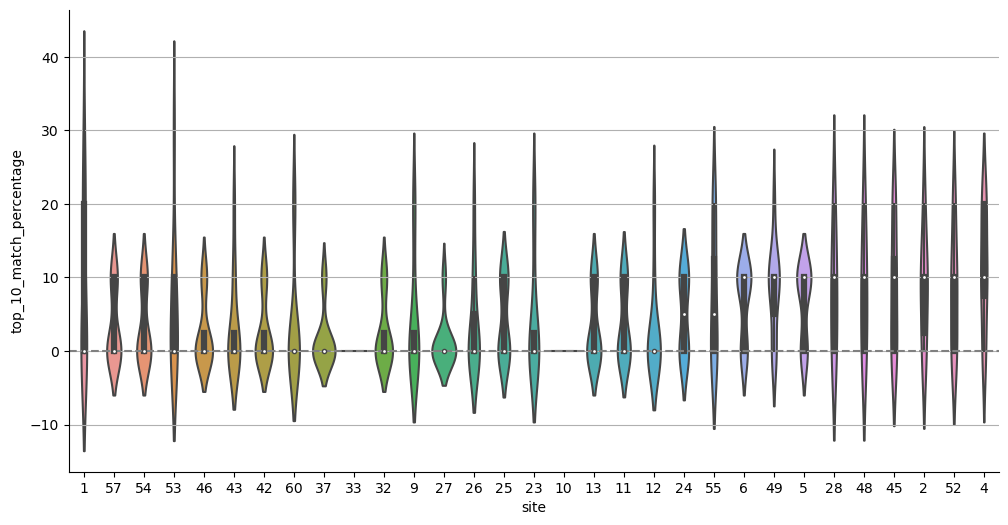

In [44]:
medians = results.groupby('site')['top_10_match_percentage'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=results, y='top_10_match_percentage', x='site', order=medians.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
#plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)


#plt.savefig('climatic_distance.png')
# Show the plot
plt.show()

In [24]:
results['site'] = results['site'].astype(int)
# Add a new column to differentiate between the two DataFrames
results['dataset'] = 'results'
cd_results['dataset'] = 'results_cd'

# Concatenate the two DataFrames
combined_results = pd.concat([results, cd_results])


In [25]:
combined_results

,index,top_10_match_percentage,site,plot,dataset
0,1_1_1,16.666667,1,1,results
1,1_1_2,33.333333,1,2,results
2,1_1_3,20.000000,1,3,results
3,1_1_4,20.000000,1,4,results
4,1_1_5,26.666667,1,5,results
...,...,...,...,...,...
350,60_1_8,16.666667,60,8,results_cd
351,60_1_9,16.666667,60,9,results_cd
352,60_1_10,20.000000,60,10,results_cd
353,60_1_11,30.000000,60,11,results_cd


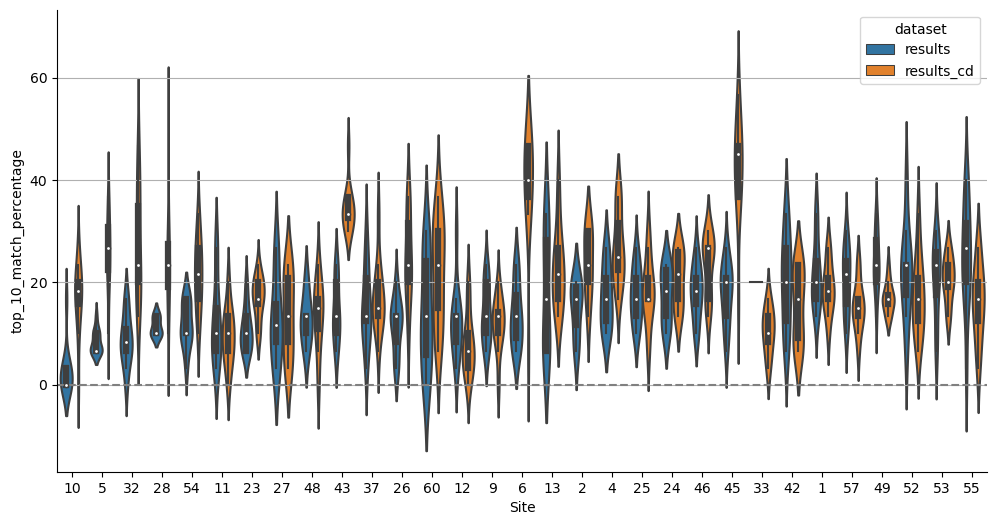

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate medians of 'sp_correlation' for 'results' only to determine the order
medians_results = results.groupby('site')['top_10_match_percentage'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the violin plot, using 'hue' to distinguish between 'results' and 'results_cd'
sns.violinplot(data=combined_results, y='top_10_match_percentage', x='site', hue='dataset', order=medians_results.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')

# Grid and spine settings
plt.grid(axis='y')
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and title
plt.xlabel('Site')

# Display the plot
plt.show()


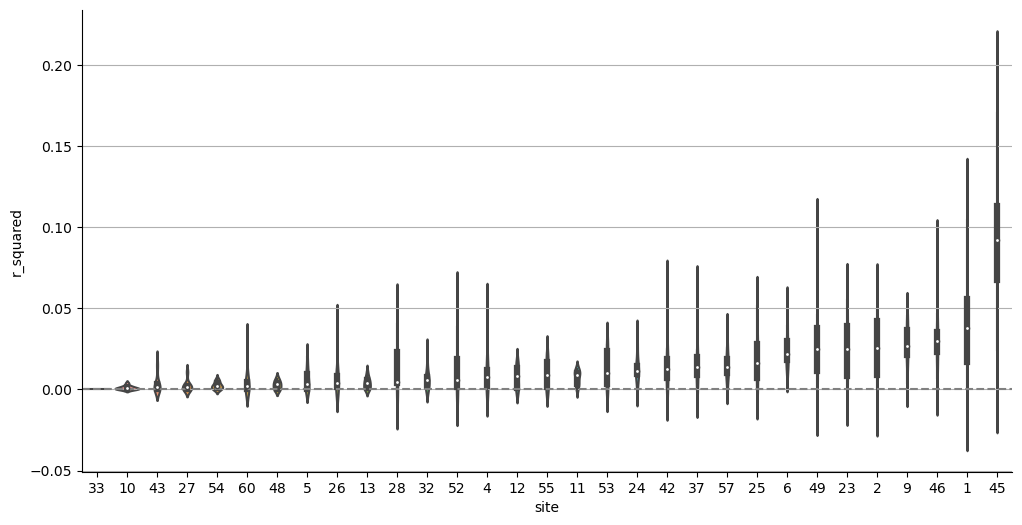

In [128]:
medians = results.groupby('site')['r_squared'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=results, y='r_squared', x='site', order=medians.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
#plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)


#plt.savefig('climatic_distance.png')
# Show the plot
plt.show()

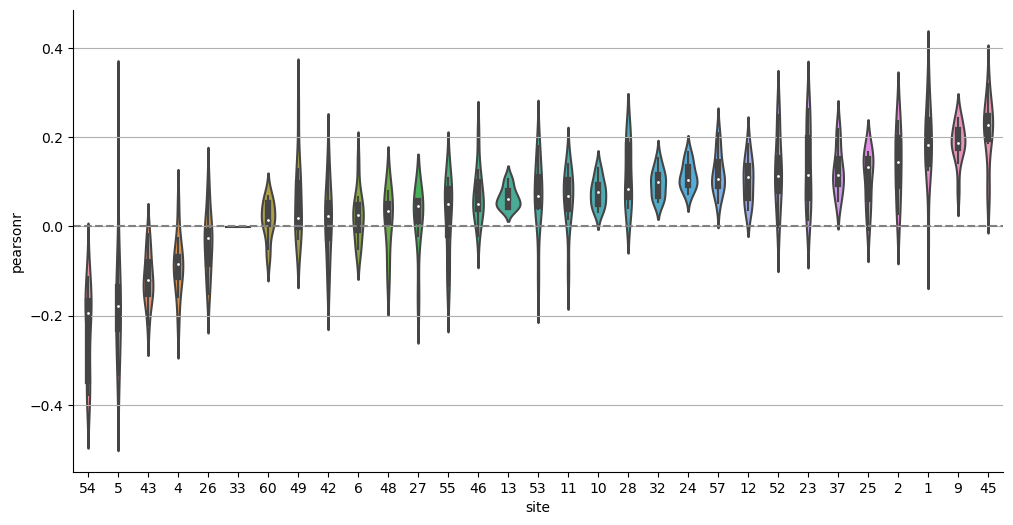

In [115]:
medians = results.groupby('site')['pearsonr'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=results, y='pearsonr', x='site', order=medians.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
#plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

#plt.savefig('climatic_distance.png')
# Show the plot
plt.show()

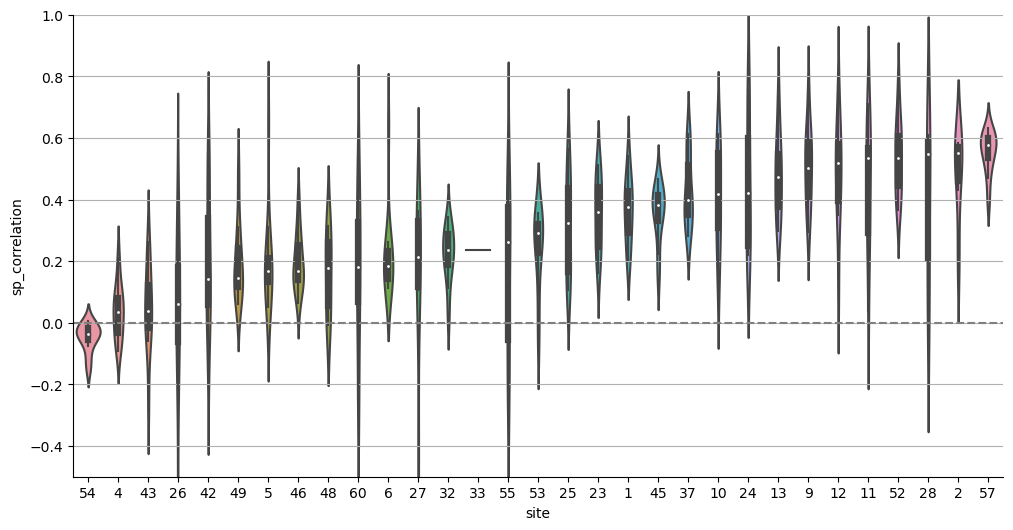

In [114]:
medians = results.groupby('site')['sp_correlation'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=results, y='sp_correlation', x='site', order=medians.index)
plt.ylim(-0.5, 1)  # Set the maximum y-value to 1

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
#plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

# Optionally, add labels or a title

#plt.savefig('climatic_distance.png')
# Show the plot
plt.show()

In [31]:
results.columns

Index(['index', 'sp_correlation', 'pearsonr', 'r_squared', 'site', 'plot'], dtype='object')

In [32]:
results['site'] = results['site'].astype(int)

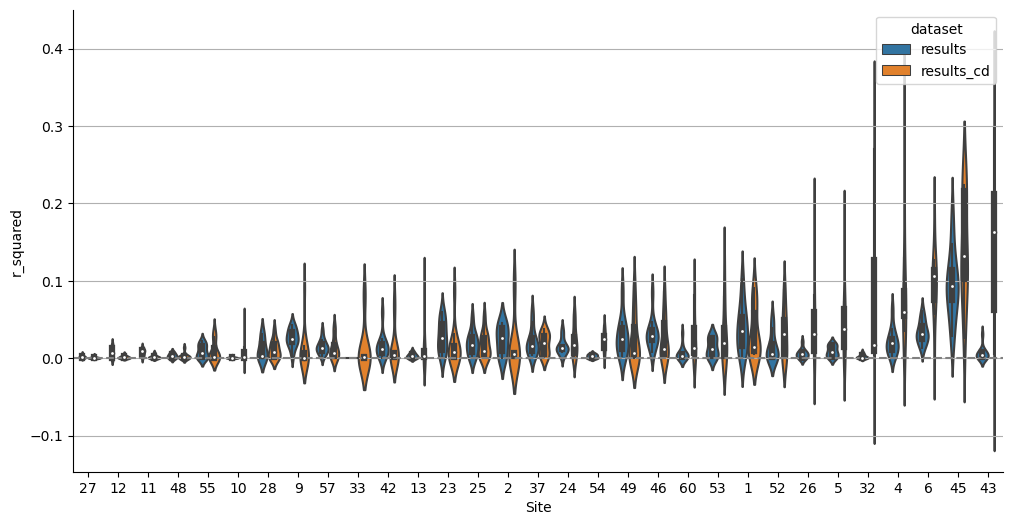

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a new column to differentiate between the two DataFrames
results['dataset'] = 'results'
cd_results['dataset'] = 'results_cd'

# Concatenate the two DataFrames
combined_results = pd.concat([results, cd_results])

# Calculate medians of 'sp_correlation' for 'results' only to determine the order
medians_results = cd_results.groupby('site')['r_squared'].mean().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the violin plot, using 'hue' to distinguish between 'results' and 'results_cd'
sns.violinplot(data=combined_results, y='r_squared', x='site', hue='dataset', order=medians_results.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')

# Grid and spine settings
plt.grid(axis='y')
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and title
plt.xlabel('Site')

# Display the plot
plt.show()


In [35]:
combined_results.groupby('dataset')['sp_correlation'].mean()

dataset
results       0.339712
results_cd    0.255623
Name: sp_correlation, dtype: float64

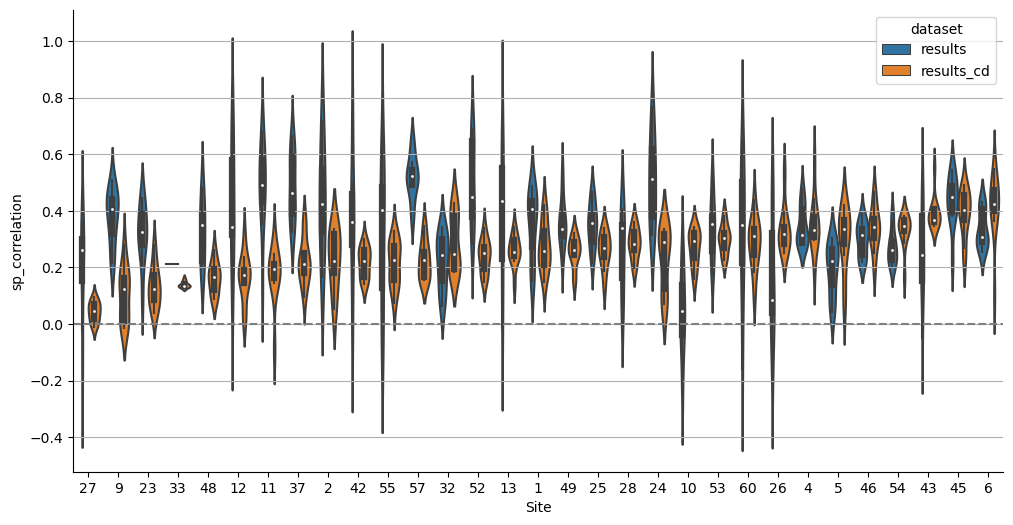

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a new column to differentiate between the two DataFrames
results['dataset'] = 'results'
cd_results['dataset'] = 'results_cd'

# Concatenate the two DataFrames
combined_results = pd.concat([results, cd_results])

# Calculate medians of 'sp_correlation' for 'results' only to determine the order
medians_results = cd_results.groupby('site')['sp_correlation'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the violin plot, using 'hue' to distinguish between 'results' and 'results_cd'
sns.violinplot(data=combined_results, y='sp_correlation', x='site', hue='dataset', order=medians_results.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')

# Grid and spine settings
plt.grid(axis='y')
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and title
plt.xlabel('Site')

# Display the plot
plt.show()


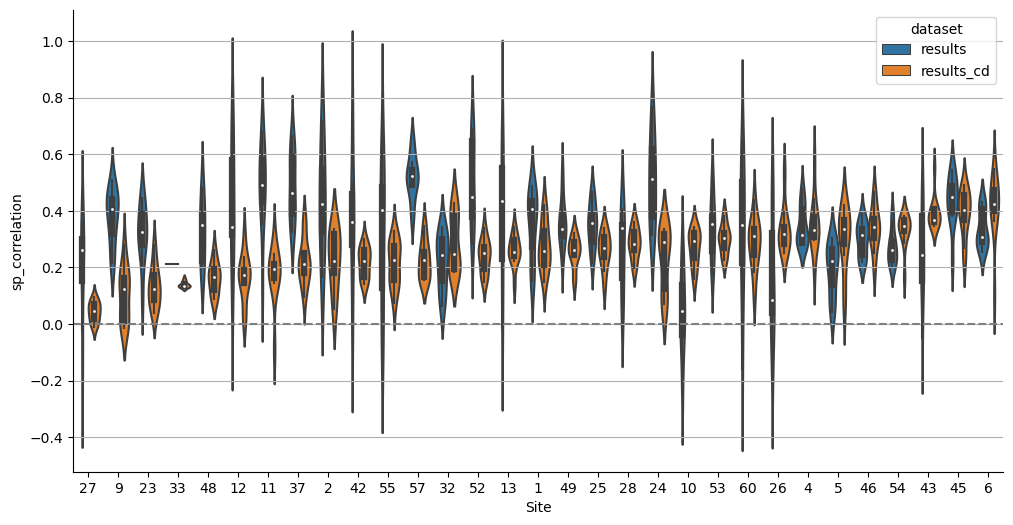

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a new column to differentiate between the two DataFrames
results['dataset'] = 'results'
cd_results['dataset'] = 'results_cd'

# Concatenate the two DataFrames
combined_results = pd.concat([results, cd_results])

# Calculate medians of 'sp_correlation' for 'results' only to determine the order
medians_results = cd_results.groupby('site')['sp_correlation'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the violin plot, using 'hue' to distinguish between 'results' and 'results_cd'
sns.violinplot(data=combined_results, y='sp_correlation', x='site', hue='dataset', order=medians_results.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')

# Grid and spine settings
plt.grid(axis='y')
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and title
plt.xlabel('Site')

# Display the plot
plt.show()


In [41]:
generation_1_parallelism = pd.read_csv('../key_files/generation_1_parallelism.txt',sep='\t')

In [ ]:
parallelism_snps = generation_1_parallelism[generation_1_parallelism['source'] == 'snp']

parallelism_snps_order = parallelism_snps[['site','mean']].set_index('site').sort_values('mean')

In [63]:
parallelism_ecotypes = generation_1_parallelism[generation_1_parallelism['source'] == 'ecotype']
parallelism_ecotypes_order = parallelism_ecotypes[['site','mean']].set_index('site').sort_values('mean')

In [ ]:
# Add a new column to differentiate between the two DataFrames
results['dataset'] = 'results'
cd_results['dataset'] = 'results_cd'

# Concatenate the two DataFrames
combined_results = pd.concat([results, cd_results])

In [51]:
combined_results = combined_results.merge(parallelism_snps, on='site')

In [52]:
combined_results

,index,sp_correlation,pearsonr,r_squared,site,plot,dataset,mean,lower,upper,generation,source
0,1_1_1,0.195745,0.128679,0.016558,1,1,results,0.399356,0.369797,0.428495,1,snp
1,1_1_2,0.486673,0.319027,0.101779,1,2,results,0.399356,0.369797,0.428495,1,snp
2,1_1_3,0.421820,0.249019,0.062011,1,3,results,0.399356,0.369797,0.428495,1,snp
3,1_1_4,0.387822,0.157357,0.024761,1,4,results,0.399356,0.369797,0.428495,1,snp
4,1_1_5,0.453575,0.224141,0.050239,1,5,results,0.399356,0.369797,0.428495,1,snp
...,...,...,...,...,...,...,...,...,...,...,...,...
668,60_1_8,0.356113,0.102787,0.010565,60,8,results_cd,0.071068,0.036245,0.102571,1,snp
669,60_1_9,0.239475,0.139979,0.019594,60,9,results_cd,0.071068,0.036245,0.102571,1,snp
670,60_1_10,0.315818,0.194995,0.038023,60,10,results_cd,0.071068,0.036245,0.102571,1,snp
671,60_1_11,0.343447,0.301149,0.090691,60,11,results_cd,0.071068,0.036245,0.102571,1,snp


In [53]:
medians_results

site
27    0.044829
9     0.123007
23    0.124506
33    0.134840
48    0.166222
12    0.172970
11    0.192661
37    0.211546
2     0.221518
42    0.221572
55    0.224976
57    0.225305
32    0.245983
52    0.249510
13    0.253760
1     0.257007
49    0.260221
25    0.267460
28    0.283501
24    0.290174
10    0.292655
53    0.305497
60    0.310604
26    0.317000
4     0.331063
5     0.334967
46    0.340990
54    0.345998
43    0.365860
45    0.403980
6     0.425306
Name: sp_correlation, dtype: float64

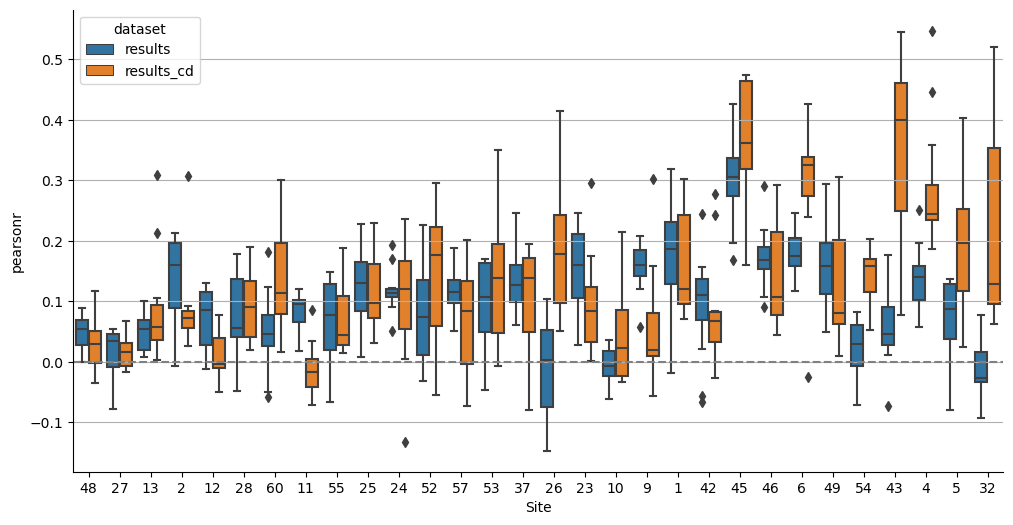

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate medians of 'sp_correlation' for 'results' only to determine the order
#medians_results = cd_results.groupby('site')['mean'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the violin plot, using 'hue' to distinguish between 'results' and 'results_cd'
sns.boxplot(data=combined_results, y='pearsonr', x='site', hue='dataset', order=parallelism_ecotypes_order.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')

# Grid and spine settings
plt.grid(axis='y')
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and title
plt.xlabel('Site')

# Display the plot
plt.show()

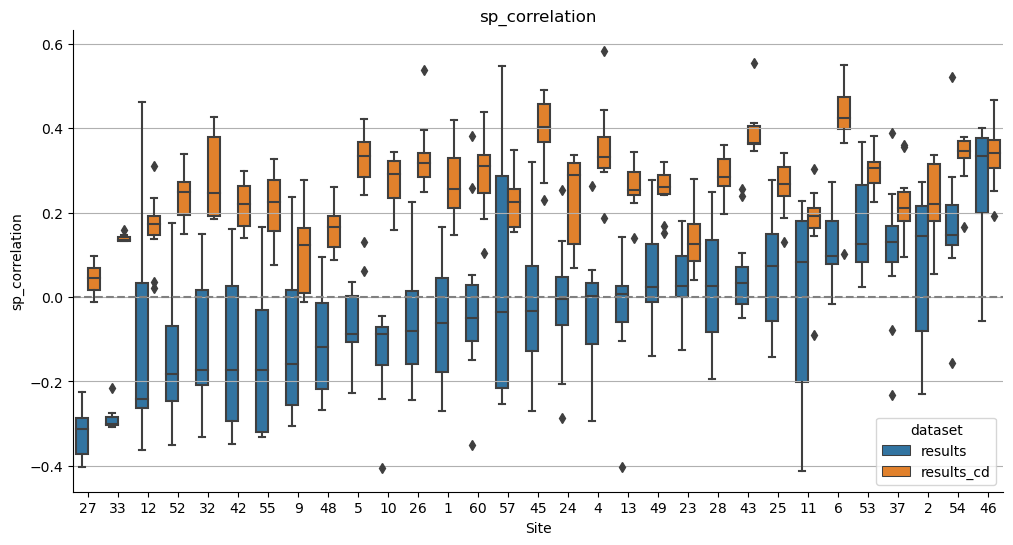

In [253]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a new column to differentiate between the two DataFrames
results['dataset'] = 'results'
cd_results['dataset'] = 'results_cd'

# Concatenate the two DataFrames
combined_results = pd.concat([results, cd_results])

# Calculate medians of 'sp_correlation' for 'results' only to determine the order
medians_results = results.groupby('site')['sp_correlation'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the violin plot, using 'hue' to distinguish between 'results' and 'results_cd'
sns.boxplot(data=combined_results, y='sp_correlation', x='site', hue='dataset', order=medians_results.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')

# Grid and spine settings
plt.grid(axis='y')
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and title
plt.title('sp_correlation')
plt.xlabel('Site')
plt.ylabel('sp_correlation')

# Display the plot
plt.show()


/home/tbellagio/miniforge3/envs/pipeline_snakemake/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tbellagio/miniforge3/envs/pipeline_snakemake/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


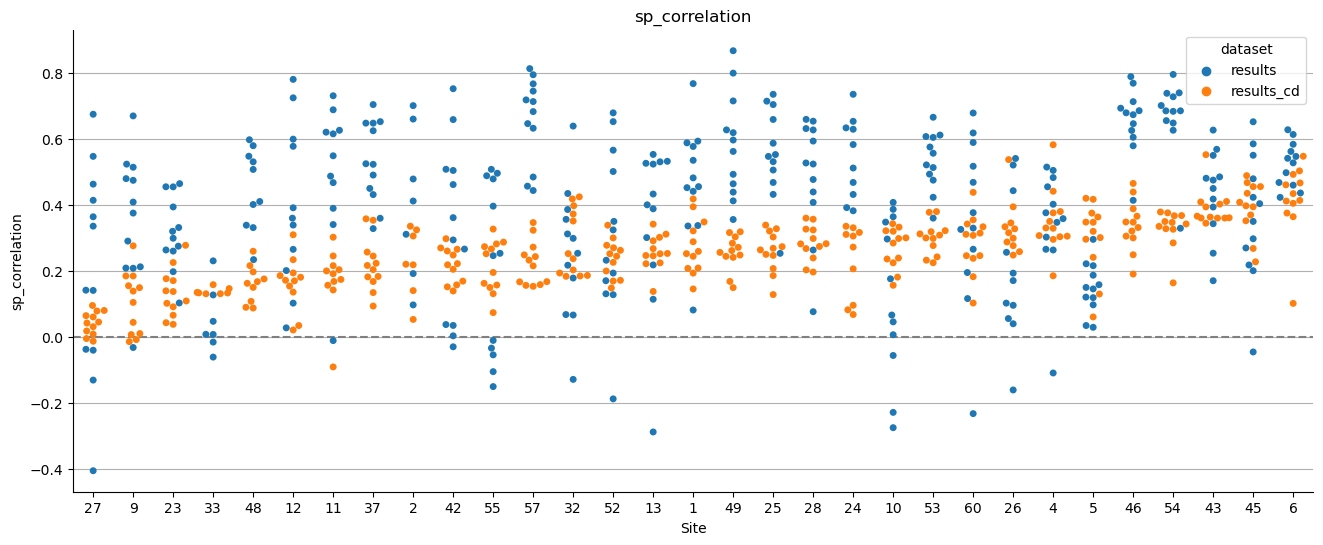

In [273]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a new column to differentiate between the two DataFrames
results['dataset'] = 'results'
cd_results['dataset'] = 'results_cd'

# Concatenate the two DataFrames
combined_results = pd.concat([results, cd_results])

# Calculate medians of 'sp_correlation' for 'results' only to determine the order
medians_results = cd_results.groupby('site')['sp_correlation'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(16, 6))

# Create the violin plot, using 'hue' to distinguish between 'results' and 'results_cd'
sns.swarmplot(data=combined_results, y='sp_correlation', x='site', hue='dataset', order=medians_results.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')

# Grid and spine settings
plt.grid(axis='y')
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and title
plt.title('sp_correlation')
plt.xlabel('Site')
plt.ylabel('sp_correlation')

# Display the plot
plt.show()


In [66]:
conc = pd.concat([ef_f, cd],axis=1)

In [67]:
conc

,1_2_2,1
0,-0.004564,NaN
1,-0.002939,NaN
2,-0.002825,NaN
3,-0.003645,NaN
4,-0.003877,NaN
...,...,...
226,NaN,0.314736
227,NaN,0.263432
228,NaN,0.267499
229,NaN,0.267906


In [ ]:
        ef_f = ef[sample]
        conc = pd.concat([ef_f, cd],axis=1)
        conc = conc.sort_values(sample)